# Seaborn

* matplotlib의 성능 및 디자인을 업그레이드
* DataFrame을 대상으로 시각화 한다
* EDA (Exploring Data Analysis) 작업에서 많이 사용

## 실습 데이터셋 확인

In [1]:
# package import

import numpy as np
import pandas as pd

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글세팅
matplotlib.rcParams['font.size'] = 15 # 크기 세팅
matplotlib.rcParams['axes.unicode_minus'] = False 

In [9]:
print('seaborn 버전:', sns.__version__) # 0.11.0 버전 이후 사용을 권장

seaborn 버전: 0.11.2


In [3]:
# 데이터 준비
# seaborn 데이터셋 위치 : https://github.com/mwaskom/seaborn-data

df = sns.load_dataset('mpg')
display(df.head())
df.shape

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


(398, 9)

In [ ]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [ ]:
# 데이터 요약본
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
# 결측치 보기
# isna(), isnull()
df.isna().sum() 
# df.isnull().mean()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
# 기술통계 확인하기
df.describe() # 수치 정보만 이용해서 기술통계값 출력

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
df.describe(include='object') 

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


In [6]:
df['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [11]:
# 유니크한 정보
df['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

# 관계형 그래프

## replot()
- 변수간의 상관성을 시각화 하는 그래프
- relplot()은 매개변수 kind="scatter"나 kind="line"을 통해서 그래프 종류를 선택할 수 있고, kind 매개변수를 지정하지 않으면 scatter가 기본으로 적용된다.
- hue 매개변수를 통해 제조국(origin)별 포인트의 색깔을 다르게 지정할 수 있다.

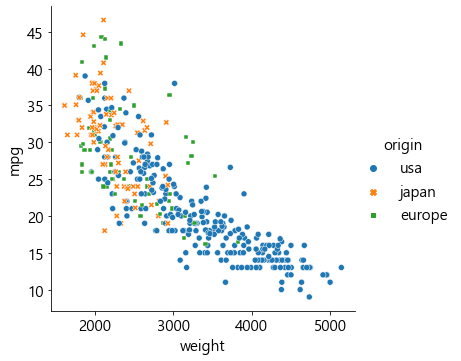

In [7]:
sns.relplot(data=df, x='weight', y='mpg', hue='origin', style='origin')
plt.show()

- col 매개변수에 범주형 컬럼을 지정하여 해달 컬럼의 범주 값 만큼 그래프를 분할하여 그려준다.

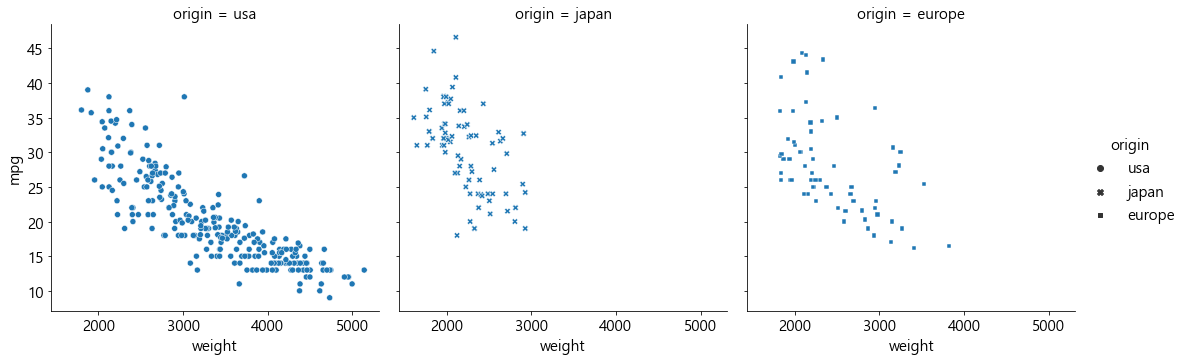

In [11]:
sns.relplot(data=df, x='weight', y='mpg', col='origin', style='origin')
plt.show()

## regplot()
- **선형회귀선**을 추가적으로 그림

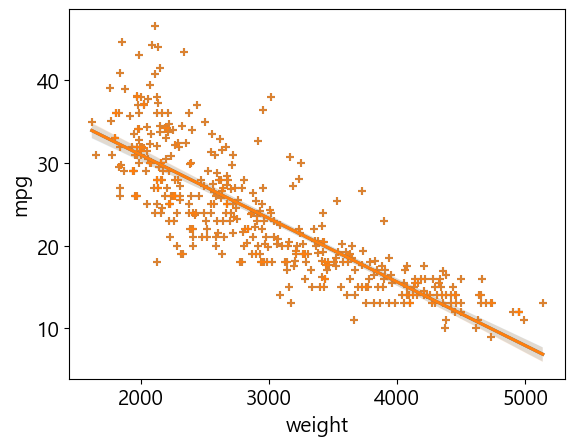

In [17]:
sns.regplot(data=df, x='weight', y='mpg', marker='+')
plt.show()

## lmplot()
- 데이터의 산점도와 함께 선형회귀 모델 적합을 플롯팅 한다.

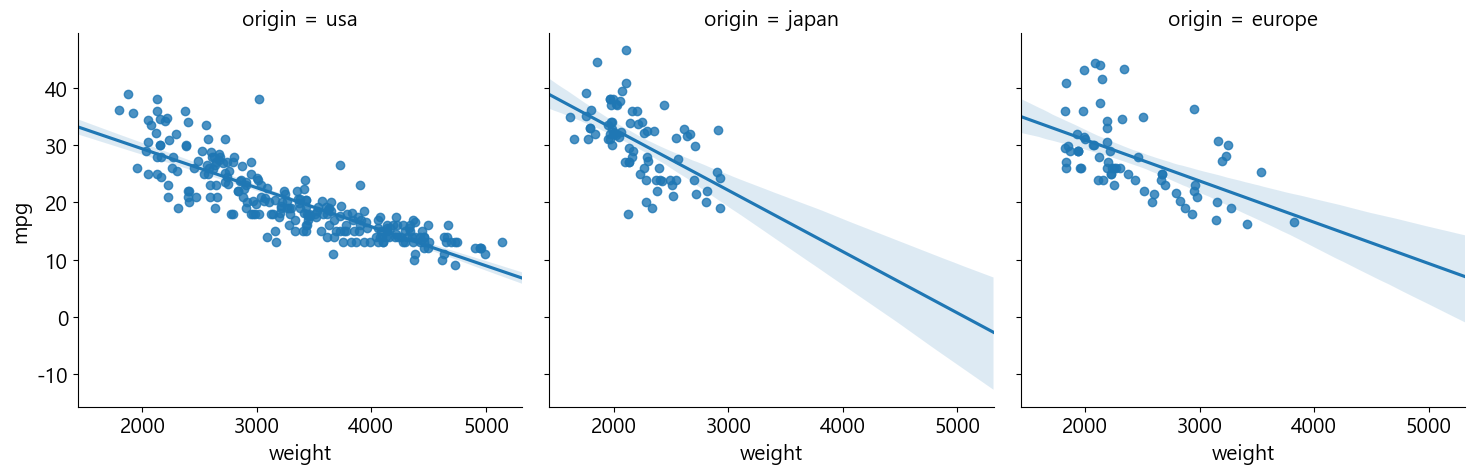

In [28]:
sns.lmplot(data=df, x='weight', y='mpg', col='origin', truncate=False)
plt.show()

## pairplot 
- 각 변수들의 분포와 모든 변수들간의 분포 관계를 보여준다.
- 시간이 오래걸림 ==> 그래서, 원하는 컬럼만 추출해서 그리는 경우가 많다.
- vars: 보고 싶은 컬럼명을 리스트로 전달

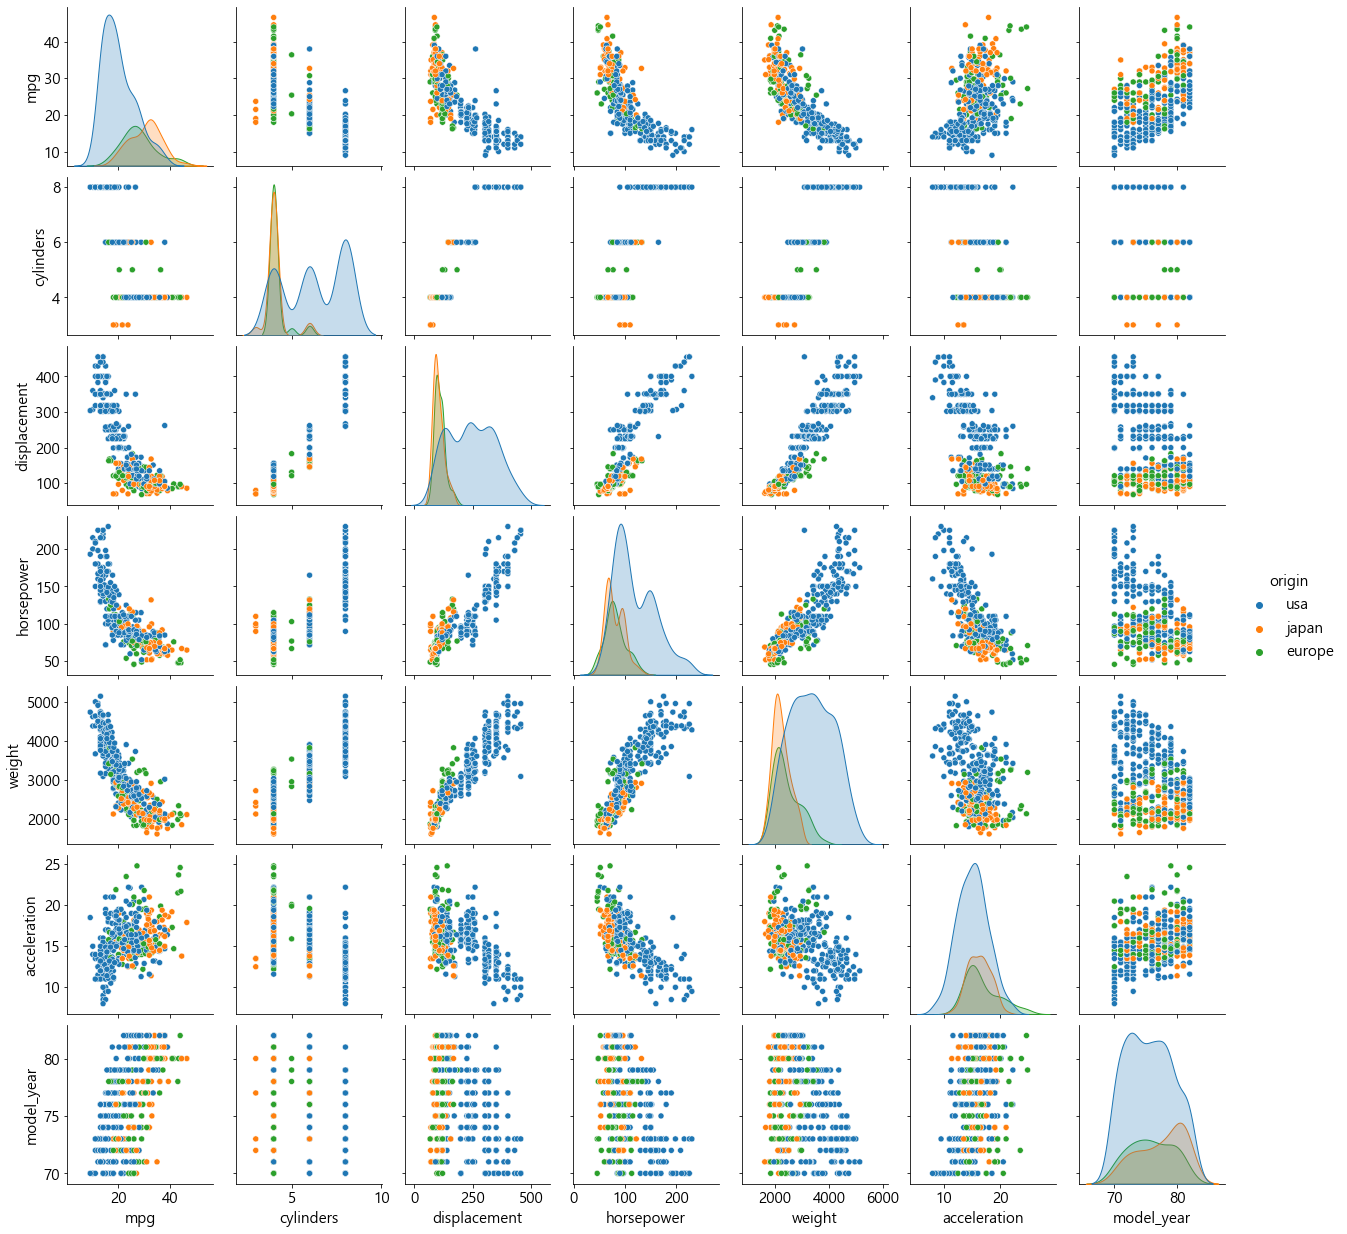

In [60]:
sns.pairplot(data=df, hue='origin')

## lineplot()
- 연속형 데이터들에 대한 관계를 보여주는데 적합한 그래프
- 같은 x값에 대해 여러 개의 y값을 갖는 경우에는 각 x값에 대한 평균과 95%의 신뢰구간을 평균 위주로 표시한다.
- lineplot()은 기본적으로 그래프를 그리기 전에 x값을 기준으로 데이터를 정렬하고 그래프를 그린다.

<AxesSubplot:xlabel='model_year', ylabel='mpg'>

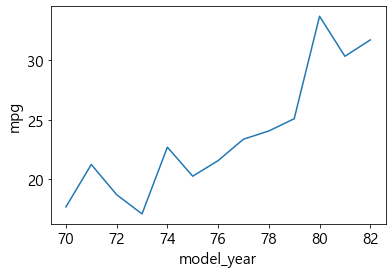

In [14]:
# ci : 신뢰구간이 그림자로 나타남, 없애기 위해서는 None으로 지정
sns.lineplot(data=df, x='model_year', y='mpg', ci=None)

## heatmap()
- 데이터의 상관관계 정도에 따라 색차이를 부여한 그래프
- 2차원 데이터가 필요

In [101]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [104]:
iris.pivot_table(index='species')#, aggfunc=['mean','min','max'])

,petal_length,petal_width,sepal_length,sepal_width
species,,,,
setosa,1.462,0.246,5.006,3.428
versicolor,4.260,1.326,5.936,2.770
virginica,5.552,2.026,6.588,2.974


In [105]:
corr = iris.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


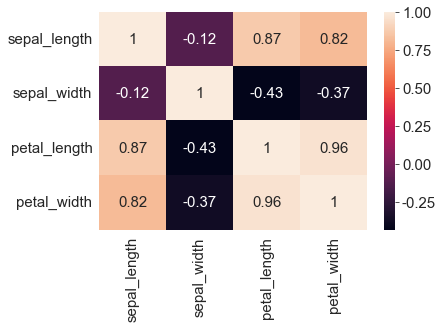

In [107]:
sns.heatmap(corr, annot=True)

# 1) 꽃잎의 길이가 길면 너비도 넓다.
# 2) 꽃잎의 길이와 꽃받침의 길이 또한 높은 상관관계를 가진다.
# 3) 꽃받침의 너비와 꽃받침의 길이는 거의 관계가 없다.

# 분포형 그래프

## 히스토그램 
- kde: True/False 값. 밀도를 추정할 수 있다.
- bins: 최소 최대값 사이 몇 개의 칸으로 나눠서 그릴지 지정
- kind 매개변수를 지정하지 않으면 기본으로 'hist'가 된다.

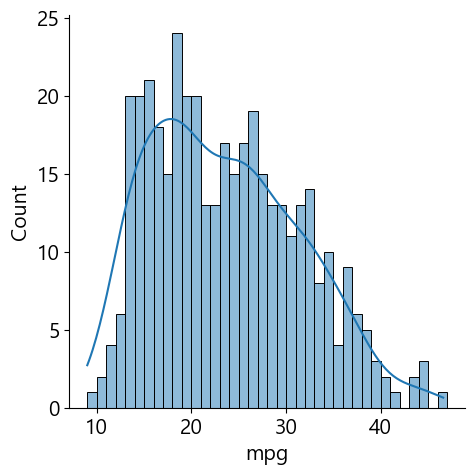

In [31]:
sns.displot(df, x='mpg', binwidth=1, kde=True)
plt.show()

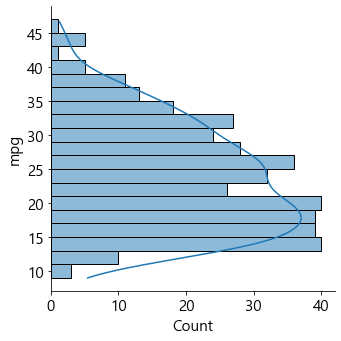

In [10]:
# y 파라매터만 지정하면 가로로 된 히스토그램을 그린다.
sns.displot(df, y='mpg', binwidth=2, kde=True)

- hue 파라매터를 이용하여 제조 국가별 비교 그래프를 그릴 수 있다.
- 겹쳐지는 부분이 있어 구분이 쉽지 않은 단점
- multiple 파라매터의 값을 'stack'으로 지정하면 각 항목이 겹치지 않는다.
- multiple: 'layer', 'dodge', 'stack', 'fill'

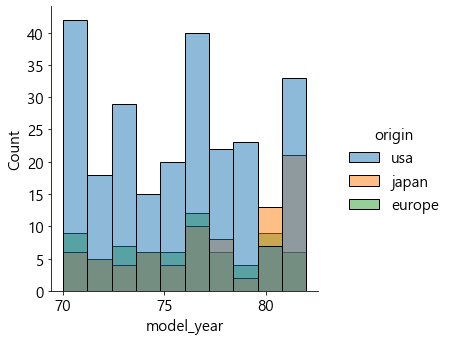

In [31]:
sns.displot(data=df, x='model_year', hue='origin')#, multiple='stack')

- element 파라매터를 이용하여 구분을 쉽도록 할 수 있다. 
- element: 'bar', 'step', 'poly'

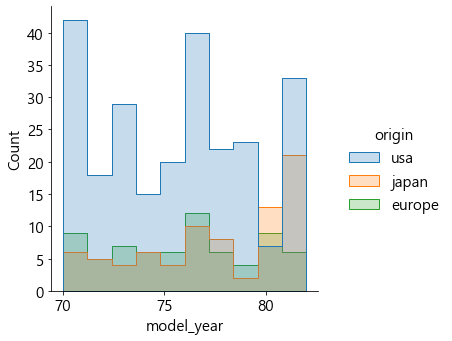

In [29]:
sns.displot(data=df, x='model_year', hue='origin', element='step')

## KDE(Kernel Density Estimation)
- 카우스 커널을 이용하여 그래프를 부드럽게 나타낸다.

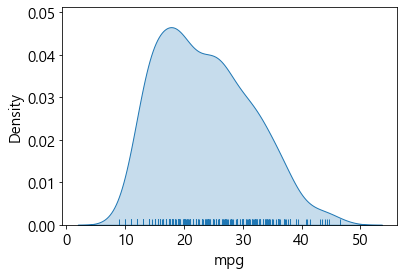

In [36]:
sns.kdeplot(data=df, x='mpg', shade=True)
sns.rugplot(data=df, x='mpg')

## barplot()
- x축에는 범주형 변수, y축에는 연속형 변수를 입력
- x에 연속형, y에 범주형을 넣으면 수평막대그래프를 출력
- estimator: 평균(기본값, np.mean), 합(np.sum), 카운트(len), 중앙값(np.median), 표준편차(np.std)
- ci: 숫자(신뢰구간, 기본값 95%), 'sd', None

In [80]:
df[df['origin'] == 'usa']['horsepower'].describe()

count    245.00000
mean     119.04898
std       39.89779
min       52.00000
25%       88.00000
50%      105.00000
75%      150.00000
max      230.00000
Name: horsepower, dtype: float64

<AxesSubplot:xlabel='origin', ylabel='horsepower'>

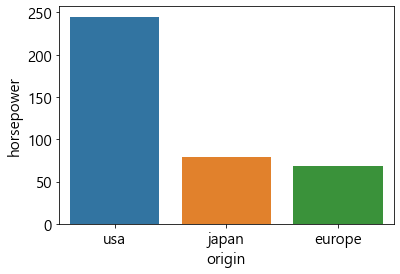

In [18]:
sns.barplot(data=df, x='origin', y='horsepower', estimator=len)#, ci=None)

## boxplot()
- 데이터를 사분위 수로 표시하는 플롯
- 데이터의 전체적인 분포를 확인하는데 유용함

In [19]:
# 기술통계 확인
df_origin = df.groupby('origin')['mpg'].describe()
df_origin

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,70.0,27.891429,6.723930,16.2,24.0,26.5,30.65,44.3
japan,79.0,30.450633,6.090048,18.0,25.7,31.6,34.05,46.6
usa,249.0,20.083534,6.402892,9.0,15.0,18.5,24.00,39.0


In [20]:
# 박스플롯을 통해 데이터 이해하기
europe = df_origin.loc['europe'] # Series로 추출
europe

count    70.000000
mean     27.891429
std       6.723930
min      16.200000
25%      24.000000
50%      26.500000
75%      30.650000
max      44.300000
Name: europe, dtype: float64

In [22]:
# IQR 
Q1 = europe['25%']
Q3 = europe['75%']
IQR = Q3 - Q1

# 이 값(경계값) 밖의 데이터가 이상치이다.
MAX = Q3 + (1.5 * IQR) 
MIN = Q1 - (1.5 * IQR)
print(MIN, MAX)

24.0
14.025000000000002 40.625


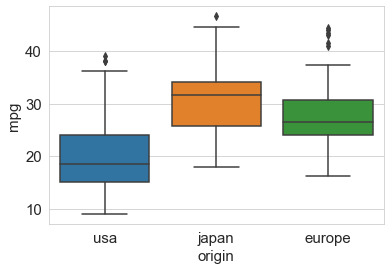

In [90]:
sns.set_style('whitegrid')
sns.boxplot(data=df, x='origin', y='mpg')

## violinplot()
- 데이터의 분포에 따라 통통하고 홀쭉하게 표현한 모습이 바이올린을 닮은 그래프
- boxplot은 이상치를 한 눈에 파악할 수 있고, violinplot은 데이터 분포를 한 눈에 파악할 수 있음

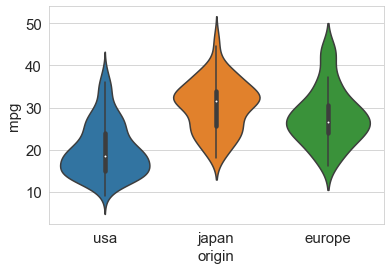

In [91]:
sns.violinplot(data=df, x='origin', y='mpg')

## countplot()
- histplot과 마찬가지로 동일한 데이터의 갯수를 count
- histplot은 연속형 데이터, countplot은 범주형 데이터를 입력받음

In [92]:
# 나라별
df['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

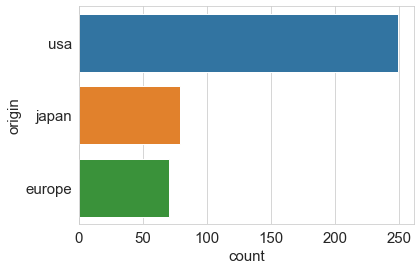

In [93]:
# 빈도수를 시각화
sns.countplot(data=df, y='origin')

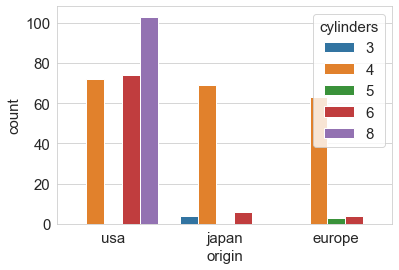

In [96]:
sns.countplot(data=df, x='origin', hue='cylinders')

## stripplot()
- 연속형 변수와 범주형 변수의 관계를 나타내는 scatterplot
- scatterplot은 연속형과 연속형 사이의 관계를 나타냄
- 어느 축에 연속형 변수를 넣느냐에 따라 그래프의 방향이 바뀜

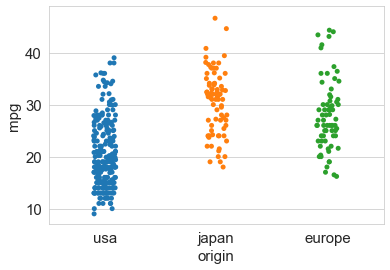

In [97]:
sns.stripplot(data=df, x='origin', y='mpg')